# 一、Pandas 统计分析基础

## 1.读取查看P2P网贷数据主表基本信息

In [1]:
import pandas as pd
master = pd.read_csv("Training_Master.csv",encoding='gbk')
master

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,222,-1,0,0,0,0,0,1,0,2014/3/5
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,1,-1,0,0,0,0,0,2,0,2014/2/26
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,-1,-1,-1,1,0,0,0,0,0,2014/2/28
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,0,0,0,0,0,0,2014/2/25
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,-1,-1,-1,0,0,0,0,0,0,2014/2/27
5,10008,1.0,吴忠,5.0,银川,NaN,0.0,NaN,2.0,2.0,...,-1,-1,-1,0,0,0,0,0,0,2014/2/27
6,10011,1.0,绵阳,3.0,赤峰,NaN,0.0,NaN,13.0,1.0,...,14,-1,0,1,0,0,0,1,1,2014/2/24
7,10015,4.0,东莞,5.0,东莞,NaN,0.0,NaN,12.0,6.0,...,559,-1,0,1,0,0,0,1,0,2014/2/28
8,10019,1.0,赤峰,6.0,赤峰,NaN,0.0,NaN,10.0,6.0,...,-1,-1,-1,0,0,0,1,0,1,2014/2/24
9,10021,3.0,武汉,5.0,鄂州,NaN,0.0,NaN,1.0,1.0,...,-1,-1,-1,1,0,0,0,0,0,2014/2/27


### （1）使用ndim、shape、memory_usage属性分别查看维度、大小、占用内存

In [2]:
print("Data frame 's dimensions:",master.ndim)
print("Data frame 's shape:",master.shape)
print("Data frame 's memory_usage:",master.memory_usage)

Data frame 's dimensions: 2
Data frame 's shape: (30000, 228)
Data frame 's memory_usage: <bound method DataFrame.memory_usage of          Idx  UserInfo_1  UserInfo_2  UserInfo_3  UserInfo_4  WeblogInfo_1  \
0      10001         1.0          深圳         4.0          深圳           NaN   
1      10002         1.0          温州         4.0          温州           NaN   
2      10003         1.0          宜昌         3.0          宜昌           NaN   
3      10006         4.0          南平         1.0          南平           NaN   
4      10007         5.0          辽阳         1.0          辽阳           NaN   
5      10008         1.0          吴忠         5.0          银川           NaN   
6      10011         1.0          绵阳         3.0          赤峰           NaN   
7      10015         4.0          东莞         5.0          东莞           NaN   
8      10019         1.0          赤峰         6.0          赤峰           NaN   
9      10021         3.0          武汉         5.0          鄂州           NaN   
10     10022

### （2）使用describe方法进行描述性统计，剔除值相同或全空的列

In [3]:
def dropNullStd(data):
    beforelen = data.shape[1]
    colisNull = data.describe().loc['count']==0 #计数为0，即空列
    for i in range(len(colisNull)):
        if colisNull[i]:
            data.drop((colisNull).index[i],axis=1,inplace=True)
    stdisZero = data.describe().loc['std'] == 0 #标准差同，值相同
    for i in range(len(stdisZero)):
        if stdisZero[i]:
            data.drop(stdisZero.index[i],axis=1,inplace=True)
    afterlen = data.shape[1]
    print('Deleted:',beforelen-afterlen)
    print('Shape after change:',data.shape)
dropNullStd(master)
master.describe()

Deleted: 2
Shape after change: (30000, 226)


,Idx,UserInfo_1,UserInfo_3,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,...,SocialNetwork_9,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target
count,30000.000000,29994.000000,29993.000000,970.000000,28342.000000,970.000000,28349.000000,28349.000000,28349.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,46318.673267,3.219911,4.694329,2.201031,0.131466,1.308247,3.025962,1.816960,2.948711,10.632800,...,35.516167,75.211233,-0.999267,-0.745033,0.221167,0.062033,0.027967,0.016633,0.253467,0.073267
std,26640.397805,1.827684,1.321458,7.831679,0.358486,7.866457,3.772421,1.701177,3.770300,16.097588,...,135.954587,742.978305,0.052911,0.441473,0.420545,0.242598,0.164880,0.127895,0.437296,0.260578
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22924.250000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46849.500000,3.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,6.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69447.250000,5.000000,5.000000,1.000000,0.000000,1.000000,3.000000,2.000000,3.000000,13.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,91703.000000,7.000000,7.000000,133.000000,4.000000,133.000000,165.000000,73.000000,165.000000,722.000000,...,3242.000000,71253.000000,6.000000,1.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000


### Whole

In [ ]:
import pandas as pd
master = pd.read_csv("Training_Master.csv",encoding='gbk')

def dropNullStd(data):
    beforelen = data.shape[1]
    colisNull = data.describe().loc['count']==0 #计数为0，即空列
    for i in range(len(colisNull)):
        if colisNull[i]:
            data.drop((colisNull).index[i],axis=1,inplace=True)
    stdisZero = data.describe().loc['std'] == 0 #标准差同，值相同
    for i in range(len(stdisZero)):
        if stdisZero[i]:
            data.drop(stdisZero.index[i],axis=1,inplace=True)
    afterlen = data.shape[1]
    print('Deleted:',beforelen-afterlen)
    print('Shape after change:',data.shape)

print("Data frame 's dimensions:",master.ndim)
print("Data frame 's shape:",master.shape)
print("Data frame 's memory_usage:",master.memory_usage)
dropNullStd(master)
master.describe()


## 2.提取用户信息更新表与登录信息表的时间信息

### （1）使用to_datetime函数转换用户信息更新表、登录信息表的时间字符串

In [4]:
import pandas as pd
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")
update['ListingInfo1'] = pd.to_datetime(update['ListingInfo1'])
update['UserupdateInfo2'] = pd.to_datetime(update['UserupdateInfo2'])

login['Listinginfo1'] = pd.to_datetime(login['Listinginfo1'])
login['LogInfo3'] = pd.to_datetime(login['LogInfo3'])
login

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27
5,10001,2014-03-05,107,6,2014-03-04
6,10001,2014-03-05,1,1,2014-02-20
7,10001,2014-03-05,1,20,2014-02-20
8,10001,2014-03-05,12,0,2014-02-20
9,10001,2014-03-05,1,2,2014-02-20


### （2）使用year、month、week 等方法提取两个表中的时间信息

In [5]:
'''
# Method 1:use DateIndex,but seems the result can not be calculalted.

dateIndex_update_listing = pd.DatetimeIndex(update['ListingInfo1'])
dateIndex_update_user = pd.DatetimeIndex(update['UserupdateInfo2'])


dateIndex_login_listing = pd.DatetimeIndex(login['ListingInfo1'])
dateIndex_login_user = pd.DatetimeIndex(login['LogInfo3'])

year_update_listing = dateIndex_update_listing.year
month_update_listing = dateIndex_update_listing.month
day_update_listing = dateIndex_update_listing.day
week_update_listing = dateIndex_update_listing.week

year_update_user = dateIndex_update_user.year
month_update_user = dateIndex_update_user.month
day_update_user = dateIndex_update_user.day
week_update_user = dateIndex_update_user.week

year_login_listing = dateIndex_login_listing.year
month_login_listing = dateIndex_login_listing.month
day_login_listing = dateIndex_login_listing.day
week_login_listing = dateIndex_login_listing.week

year_login_user = dateIndex_login_user.year
month_login_user = dateIndex_login_user.month
day_login_user = dateIndex_login_user.day
week_login_user = dateIndex_login_user.week



'''
# Method 2:transform data type of the column


year_update_listing = pd.DataFrame([i.year for i in update['ListingInfo1']])
month_update_listing = pd.DataFrame([i.month for i in update['ListingInfo1']])
day_update_listing = pd.DataFrame([i.day for i in update['ListingInfo1']])
week_update_listing =pd.DataFrame([i.week for i in update['ListingInfo1']])

year_update_user = pd.DataFrame([j.year for j in update['UserupdateInfo2']])
month_update_user = pd.DataFrame([j.month for j in update['UserupdateInfo2']])
day_update_user = pd.DataFrame([i.day for i in update['UserupdateInfo2']])
week_update_user = pd.DataFrame([j.week for j in update['UserupdateInfo2']])

year_login_listing = pd.DataFrame([k.year for k in login['Listinginfo1']])
month_login_listing = pd.DataFrame([k.month for k in login['Listinginfo1']])
day_login_listing = pd.DataFrame([k.day for k in login['Listinginfo1']])
week_login_listing = pd.DataFrame([k.week for k in login['Listinginfo1']])

year_login_user = pd.DataFrame([l.year for l in login['LogInfo3']])
month_login_user = pd.DataFrame([l.month for l in login['LogInfo3']])
day_login_user = pd.DataFrame([l.day for l in login['LogInfo3']])
week_login_user = pd.DataFrame([l.week for l in login['LogInfo3']])

conculsion_update_listing = pd.concat((year_update_listing,month_update_listing,day_update_listing,week_update_listing),axis = 1)
conculsion_update_listing.columns =['年', '月', '日', '周']

conculsion_update_user = pd.concat((year_update_user,month_update_user,day_update_user,week_update_user),axis = 1)
conculsion_update_user.columns =['年', '月', '日', '周']

conculsion_login_listing = pd.concat((year_login_listing,month_login_listing,day_login_listing,week_login_listing),axis = 1)
conculsion_login_listing.columns =['年', '月', '日', '周']

conculsion_login_user = pd.concat((year_login_user,month_login_user,day_login_user,week_login_user),axis = 1)
conculsion_login_user.columns =['年', '月', '日', '周']


print(conculsion_update_listing)
print(conculsion_update_user)
print(conculsion_login_listing)
print(conculsion_login_user)


           年  月   日   周
0       2014  3   5  10
1       2014  3   5  10
2       2014  3   5  10
3       2014  3   5  10
4       2014  3   5  10
5       2014  3   5  10
6       2014  3   5  10
7       2014  3   5  10
8       2014  3   5  10
9       2014  3   5  10
10      2014  3   5  10
11      2014  2  26   9
12      2014  2  26   9
13      2014  2  26   9
14      2014  2  26   9
15      2014  2  26   9
16      2014  2  26   9
17      2014  2  26   9
18      2014  2  26   9
19      2014  2  26   9
20      2014  2  26   9
21      2014  2  26   9
22      2014  2  26   9
23      2014  2  26   9
24      2014  2  26   9
25      2014  2  26   9
26      2014  2  26   9
27      2014  2  26   9
28      2014  2  26   9
29      2014  2  26   9
...      ... ..  ..  ..
372433  2014  2  24   9
372434  2014  2  24   9
372435  2014  2  24   9
372436  2014  2  24   9
372437  2014  2  24   9
372438  2014  2  24   9
372439  2014  2  24   9
372440  2014  2  24   9
372441  2014  2  24   9
372442  2014  2 

### （3）计算两个表中两时间的差，分别以日、小时、分钟计算

In [6]:
update_delta = update['ListingInfo1'] -update['UserupdateInfo2']
login_delta = login['Listinginfo1']-login['LogInfo3']


print('day difference in update table:',pd.DataFrame([i.days for i in update_delta]))
print('hour difference in update table:',pd.DataFrame([i.days*24 for i in update_delta]))
print('minute difference in update table:',pd.DataFrame([i.days*24*60 for i in update_delta]))

print('day difference in login table:',pd.DataFrame([i.days for i in login_delta]))
print('hour difference in login table:',pd.DataFrame([i.days*24 for i in login_delta]))
print('minute difference in login table:',pd.DataFrame([i.days*24*60 for i in login_delta]))



day difference in update table:           0
0        13
1        13
2        13
3        13
4        13
5        13
6        13
7        13
8        13
9        13
10       13
11      250
12      250
13      250
14      250
15      250
16      250
17      233
18      233
19      233
20      233
21      250
22      250
23        6
24      250
25      250
26      250
27      250
28      250
29      250
...     ...
372433    4
372434    4
372435    4
372436    4
372437    4
372438    4
372439    4
372440    4
372441    4
372442    8
372443    8
372444    8
372445    8
372446    8
372447    8
372448    8
372449    8
372450    8
372451    8
372452   13
372453   13
372454   13
372455   13
372456   13
372457   13
372458   13
372459   13
372460   13
372461   13
372462   13

[372463 rows x 1 columns]
hour difference in update table:            0
0        312
1        312
2        312
3        312
4        312
5        312
6        312
7        312
8        312
9        312
10       312
11      

### Whole

In [ ]:
import pandas as pd
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")
update['ListingInfo1'] = pd.to_datetime(update['ListingInfo1'])
update['UserupdateInfo2'] = pd.to_datetime(update['UserupdateInfo2'])

login['Listinginfo1'] = pd.to_datetime(login['Listinginfo1'])
login['LogInfo3'] = pd.to_datetime(login['LogInfo3'])

year_update_listing = pd.DataFrame([i.year for i in update['ListingInfo1']])
month_update_listing = pd.DataFrame([i.month for i in update['ListingInfo1']])
day_update_listing = pd.DataFrame([i.day for i in update['ListingInfo1']])
week_update_listing =pd.DataFrame([i.week for i in update['ListingInfo1']])

year_update_user = pd.DataFrame([j.year for j in update['UserupdateInfo2']])
month_update_user = pd.DataFrame([j.month for j in update['UserupdateInfo2']])
day_update_user = pd.DataFrame([i.day for i in update['UserupdateInfo2']])
week_update_user = pd.DataFrame([j.week for j in update['UserupdateInfo2']])

year_login_listing = pd.DataFrame([k.year for k in login['Listinginfo1']])
month_login_listing = pd.DataFrame([k.month for k in login['Listinginfo1']])
day_login_listing = pd.DataFrame([k.day for k in login['Listinginfo1']])
week_login_listing = pd.DataFrame([k.week for k in login['Listinginfo1']])

year_login_user = pd.DataFrame([l.year for l in login['LogInfo3']])
month_login_user = pd.DataFrame([l.month for l in login['LogInfo3']])
day_login_user = pd.DataFrame([l.day for l in login['LogInfo3']])
week_login_user = pd.DataFrame([l.week for l in login['LogInfo3']])

conculsion_update_listing = pd.concat((year_update_listing,month_update_listing,day_update_listing,week_update_listing),axis = 1)
conculsion_update_listing.columns =['年', '月', '日', '周']

conculsion_update_user = pd.concat((year_update_user,month_update_user,day_update_user,week_update_user),axis = 1)
conculsion_update_user.columns =['年', '月', '日', '周']

conculsion_login_listing = pd.concat((year_login_listing,month_login_listing,day_login_listing,week_login_listing),axis = 1)
conculsion_login_listing.columns =['年', '月', '日', '周']

conculsion_login_user = pd.concat((year_login_user,month_login_user,day_login_user,week_login_user),axis = 1)
conculsion_login_user.columns =['年', '月', '日', '周']


print(conculsion_update_listing)
print(conculsion_update_user)
print(conculsion_login_listing)
print(conculsion_login_user)

update_delta = update['ListingInfo1'] -update['UserupdateInfo2']
login_delta = login['Listinginfo1']-login['LogInfo3']


print('day difference in update table:',pd.DataFrame([i.days for i in update_delta]))
print('hour difference in update table:',pd.DataFrame([i.days*24 for i in update_delta]))
print('minute difference in update table:',pd.DataFrame([i.days*24*60 for i in update_delta]))

print('day difference in login table:',pd.DataFrame([i.days for i in login_delta]))
print('hour difference in login table:',pd.DataFrame([i.days*24 for i in login_delta]))
print('minute difference in login table:',pd.DataFrame([i.days*24*60 for i in login_delta]))



## 3.使用分组聚合方法进一步分析用户信息更新表和登录信息表

In [7]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")

### （1）使用groupby方法对用户信息更新表、登录信息表分组

In [8]:
update_group = update.groupby(by='Idx')
login_group = login.groupby(by='Idx')
print(login_group)

### （2）使用agg方法求取分组后的最早和最晚更新及登录时间

In [9]:
#先转换为日期，否则会被看作算术表达式
update['ListingInfo1'] = pd.to_datetime(update['ListingInfo1'])
update['UserupdateInfo2'] = pd.to_datetime(update['UserupdateInfo2'])

login['Listinginfo1'] = pd.to_datetime(login['Listinginfo1'])
login['LogInfo3'] = pd.to_datetime(login['LogInfo3'])


update_group_time = update_group[['ListingInfo1','UserupdateInfo2']].agg([np.min,np.max])
login_group_time = login_group[['Listinginfo1','LogInfo3']].agg([np.min,np.max])

login_group_time

Listinginfo1              LogInfo3           
              amin       amax       amin       amax
Idx                                                
3       2013-11-05 2013-11-05 2013-08-30 2013-11-01
5       2013-11-07 2013-11-07 2013-10-24 2013-11-06
8       2013-11-06 2013-11-06 2013-10-25 2013-11-06
12      2013-11-01 2013-11-01 2012-12-08 2013-11-01
16      2013-11-05 2013-11-05 2013-10-27 2013-11-04
17      2013-11-05 2013-11-05 2013-10-27 2013-11-05
18      2013-11-01 2013-11-01 2013-10-27 2013-11-01
20      2013-11-01 2013-11-01 2013-10-27 2013-11-01
21      2013-11-01 2013-11-01 2013-10-28 2013-11-01
23      2013-11-01 2013-11-01 2013-08-11 2013-11-01
29      2013-11-01 2013-11-01 2013-10-28 2013-11-01
31      2013-11-05 2013-11-05 2013-10-28 2013-11-05
33      2013-11-01 2013-11-01 2011-09-19 2013-11-01
35      2013-11-05 2013-11-05 2013-10-21 2013-11-04
36      2013-11-01 2013-11-01 2013-10-28 2013-11-01
37      2013-11-01 2013-11-01 2013-05-14 2013-11-01
41      2013-11-07 2013-11-07 2013-10-29 2013-11-07
43      2013-11-04 2013-11-04 2013-10-29 2013-11-04
48      2013-11-09 2013-11-09 2013-07-04 2013-11-09
51      2013-11-05 2013-11-05 2013-10-29 2013-11-05
57      2013-11-01 2013-11-01 2013-10-29 2013-11-01
62      2013-11-05 2013-11-05 2013-09-27 2013-11-05
67      2013-11-07 2013-11-07 2013-10-29 2013-11-07
68      2013-11-01 2013-11-01 2013-08-26 2013-10-31
71      2013-11-04 2013-11-04 2013-08-04 2013-11-04
73      2013-11-01 2013-11-01 2013-10-29 2013-11-01
75      2013-11-05 2013-11-05 2013-06-10 2013-11-05
80      2013-11-01 2013-11-01 2013-10-28 2013-11-01
81      2013-11-04 2013-11-04 2013-10-29 2013-11-01
82      2013-11-01 2013-11-01 2013-10-29 2013-11-01
...            ...        ...        ...        ...
91610   2014-11-03 2014-11-03 2014-10-26 2014-11-01
91613   2014-10-29 2014-10-29 2014-10-26 2014-10-29
91617   2014-11-03 2014-11-03 2014-10-26 2014-11-01
91618   2014-11-04 2014-11-04 2014-10-25 2014-11-04
91620   2014-11-02 2014-11-02 2014-10-26 2014-10-30
91626   2014-10-30 2014-10-30 2014-10-26 2014-10-29
91628   2014-11-02 2014-11-02 2014-10-26 2014-11-02
91630   2014-10-31 2014-10-31 2014-04-23 2014-10-30
91635   2014-10-30 2014-10-30 2014-10-26 2014-10-29
91642   2014-11-02 2014-11-02 2014-10-26 2014-11-01
91643   2014-11-03 2014-11-03 2014-10-26 2014-11-03
91646   2014-10-29 2014-10-29 2014-10-25 2014-10-28
91647   2014-11-04 2014-11-04 2012-09-21 2014-10-31
91660   2014-11-03 2014-11-03 2014-10-26 2014-10-29
91666   2014-11-05 2014-11-05 2014-10-26 2014-11-05
91668   2014-10-30 2014-10-30 2014-10-26 2014-10-29
91670   2014-10-28 2014-10-28 2014-10-19 2014-10-28
91672   2014-11-03 2014-11-03 2013-03-27 2014-11-03
91674   2014-11-03 2014-11-03 2014-10-26 2014-10-28
91676   2014-11-02 2014-11-02 2014-10-26 2014-10-30
91677   2014-11-04 2014-11-04 2014-10-26 2014-11-04
91680   2014-10-28 2014-10-28 2014-04-22 2014-10-28
91681   2014-10-31 2014-10-31 2014-10-12 2014-10-29
91686   2014-10-28 2014-10-28 2014-10-26 2014-10-28
91688   2014-10-30 2014-10-30 2014-10-26 2014-10-30
91689   2014-10-29 2014-10-29 2014-10-26 2014-10-29
91693   2014-11-06 2014-11-06 2014-10-26 2014-11-05
91695   2014-10-30 2014-10-30 2014-09-26 2014-10-30
91702   2014-11-02 2014-11-02 2014-10-26 2014-10-28
91703   2014-11-03 2014-11-03 2014-10-26 2014-11-03

[28987 rows x 4 columns]

### （3）使用size方法求取分组后的数据的信息更新次数，登录次数

In [10]:
update_times = update_group.size()
login_times = login_group.size()

login_times

Idx
3         26
5         11
8        125
12       199
16        15
17        11
18        34
20        16
21        14
23        67
29        19
31        10
33        46
35        20
36        22
37        36
41        29
43        33
48        61
51        22
57        13
62        34
67        18
68        32
71        43
73        19
75        27
80       145
81        12
82        28
        ... 
91610     20
91613     14
91617     15
91618     19
91620      6
91626     13
91628     15
91630     35
91635     14
91642     11
91643     15
91646     17
91647     18
91660      6
91666     24
91668      8
91670     26
91672     21
91674      7
91676     11
91677     16
91680     24
91681     10
91686     17
91688     20
91689      7
91693     15
91695     20
91702      7
91703     21
Length: 28987, dtype: int64

### Whole:

In [ ]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")

update_group = update.groupby(by='Idx')
login_group = login.groupby(by='Idx')
print(login_group)

#先转换为日期，否则会被看作算术表达式
update['ListingInfo1'] = pd.to_datetime(update['ListingInfo1'])
update['UserupdateInfo2'] = pd.to_datetime(update['UserupdateInfo2'])

login['Listinginfo1'] = pd.to_datetime(login['Listinginfo1'])
login['LogInfo3'] = pd.to_datetime(login['LogInfo3'])


update_group_time = update_group[['ListingInfo1','UserupdateInfo2']].agg([np.min,np.max])
login_group_time = login_group[['Listinginfo1','LogInfo3']].agg([np.min,np.max])

login_group_time

update_times = update_group.size()
login_times = login_group.size()

login_times

## 4.对用户信息更新表、登录信息表进行长宽表转换

In [11]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")

update_group = update.groupby(by='Idx')
login_group = login.groupby(by='Idx')

login

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-3-5,107,6,2014-2-20
1,10001,2014-3-5,107,6,2014-2-23
2,10001,2014-3-5,107,6,2014-2-24
3,10001,2014-3-5,107,6,2014-2-25
4,10001,2014-3-5,107,6,2014-2-27
5,10001,2014-3-5,107,6,2014-3-4
6,10001,2014-3-5,1,1,2014-2-20
7,10001,2014-3-5,1,20,2014-2-20
8,10001,2014-3-5,12,0,2014-2-20
9,10001,2014-3-5,1,2,2014-2-20


### （1）使用pivot_table函数进行长宽表转换

In [12]:
import pandas as pd
import numpy as np
update = pd.read_csv("Training_Userupdate.csv")
login = pd.read_csv("Training_LogInfo.csv")

update_pivot = pd.pivot_table(update[['Idx','ListingInfo1','UserupdateInfo2']],index='Idx',aggfunc=[np.min,np.max],margins=True)
login_pivot = pd.pivot_table(login[['Idx','Listinginfo1','LogInfo3']],index='Idx',aggfunc=[np.min,np.max],margins=True)

update_pivot.columns = ['最早列表时间','最早更新时间','最晚列表时间','最晚更新时间']
login_pivot.columns = ['最早列表时间','最早登录时间','最晚列表时间','最晚登录时间']

print(update_pivot)
print(login_pivot)

           最早列表时间      最早更新时间      最晚列表时间      最晚更新时间
Idx                                                  
3      2013/11/05  2013/08/30  2013/11/05  2013/08/30
5      2013/11/07  2013/10/24  2013/11/07  2013/10/24
8      2013/11/06  2013/10/25  2013/11/06  2013/11/04
12     2013/11/01  2012/12/08  2013/11/01  2013/10/02
16     2013/11/05  2013/10/27  2013/11/05  2013/11/05
17     2013/11/05  2013/10/27  2013/11/05  2013/11/04
18     2013/11/01  2013/10/27  2013/11/01  2013/10/27
20     2013/11/01  2013/10/27  2013/11/01  2013/11/01
21     2013/11/01  2013/10/28  2013/11/01  2013/10/28
23     2013/11/01  2013/08/11  2013/11/01  2013/09/23
29     2013/11/01  2013/10/28  2013/11/01  2013/10/31
31     2013/11/05  2013/10/28  2013/11/05  2013/11/05
33     2013/11/01  2013/10/28  2013/11/01  2013/10/30
35     2013/11/05  2013/10/21  2013/11/05  2013/11/05
36     2013/11/01  2013/10/28  2013/11/01  2013/10/28
37     2013/11/01  2013/09/11  2013/11/01  2013/11/01
41     2013/11/07  2013/10/2

### （2）使用crosstab方法进行长宽表转换

In [14]:
update['count'] = 'count'
update_cross1 = pd.crosstab(index = update['Idx'],
                           columns= update['count'],
                          )
print(update_cross1)
update_cross2 = pd.crosstab(index = update['Idx'],
                           columns= update['UserupdateInfo1']
                          )
print(update_cross2)




count  count
Idx         
3         13
5         13
8         14
12        14
16        13
17        12
18        12
20        14
21        12
23        13
29        17
31        13
33        17
35        18
36        13
37        16
41        18
43        15
48        26
51        17
57        14
62        14
67        13
68        12
71        18
73        12
75        18
80        11
81        13
82        17
...      ...
91610     19
91613     15
91617     16
91618     12
91620      2
91626     15
91628     23
91630     17
91635     13
91642     15
91643     11
91646     15
91647     18
91660      2
91666      2
91668     13
91670     10
91672     27
91674     12
91676     22
91677      3
91680     16
91681     14
91686     12
91688     13
91689     12
91693      3
91695     20
91702     11
91703     15

[29995 rows x 1 columns]
UserupdateInfo1  _Age  _BussinessAddress  _ByUserId  _CityId  _CompanyAddress  \
Idx                                                                       

### Whole:

In [ ]:
login_cross1 = pd.crosstab(index = login['Idx'],
                           columns= login['LogInfo1']
                          )
print(login_cross1)

login_cross2 = pd.crosstab(index = login['Idx'],
                           columns= login['LogInfo2']
                          )
print(login_cross2)



# 五、pandas数据预处理

## 1.插补用户用电量数据缺失值


### （1）读取missing_data.csv中的数据

In [15]:
import matplotlib.pyplot as plt
from pylab import mpl
from scipy.interpolate import lagrange
from scipy.interpolate import spline
import pandas as pd
import numpy as np
missing = pd.read_excel('missing_data.xls')

### （2）查询缺失值所在位置

In [18]:
#missing[missing.isnull().values==True] ——return any column that Nan exist 
missing_c1_location = missing[missing.iloc[:,[0]].isnull().values==True].index.tolist()
missing_c2_location = missing[missing.iloc[:,[1]].isnull().values==True].index.tolist()
missing_c3_location = missing[missing.iloc[:,[2]].isnull().values==True].index.tolist()

print('Column1 miss at:',missing_c1_location)
print('Column2 miss at:',missing_c2_location)
print('Column3 miss at:',missing_c3_location)

Column1 miss at: [4, 11]
Column2 miss at: [2, 9, 18, 19]
Column3 miss at: [3, 6, 9, 15]


### （3）使用SciPy的interpolate模块的lagrange对数据进行拉格朗日插值，不存在缺失值说明成功

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


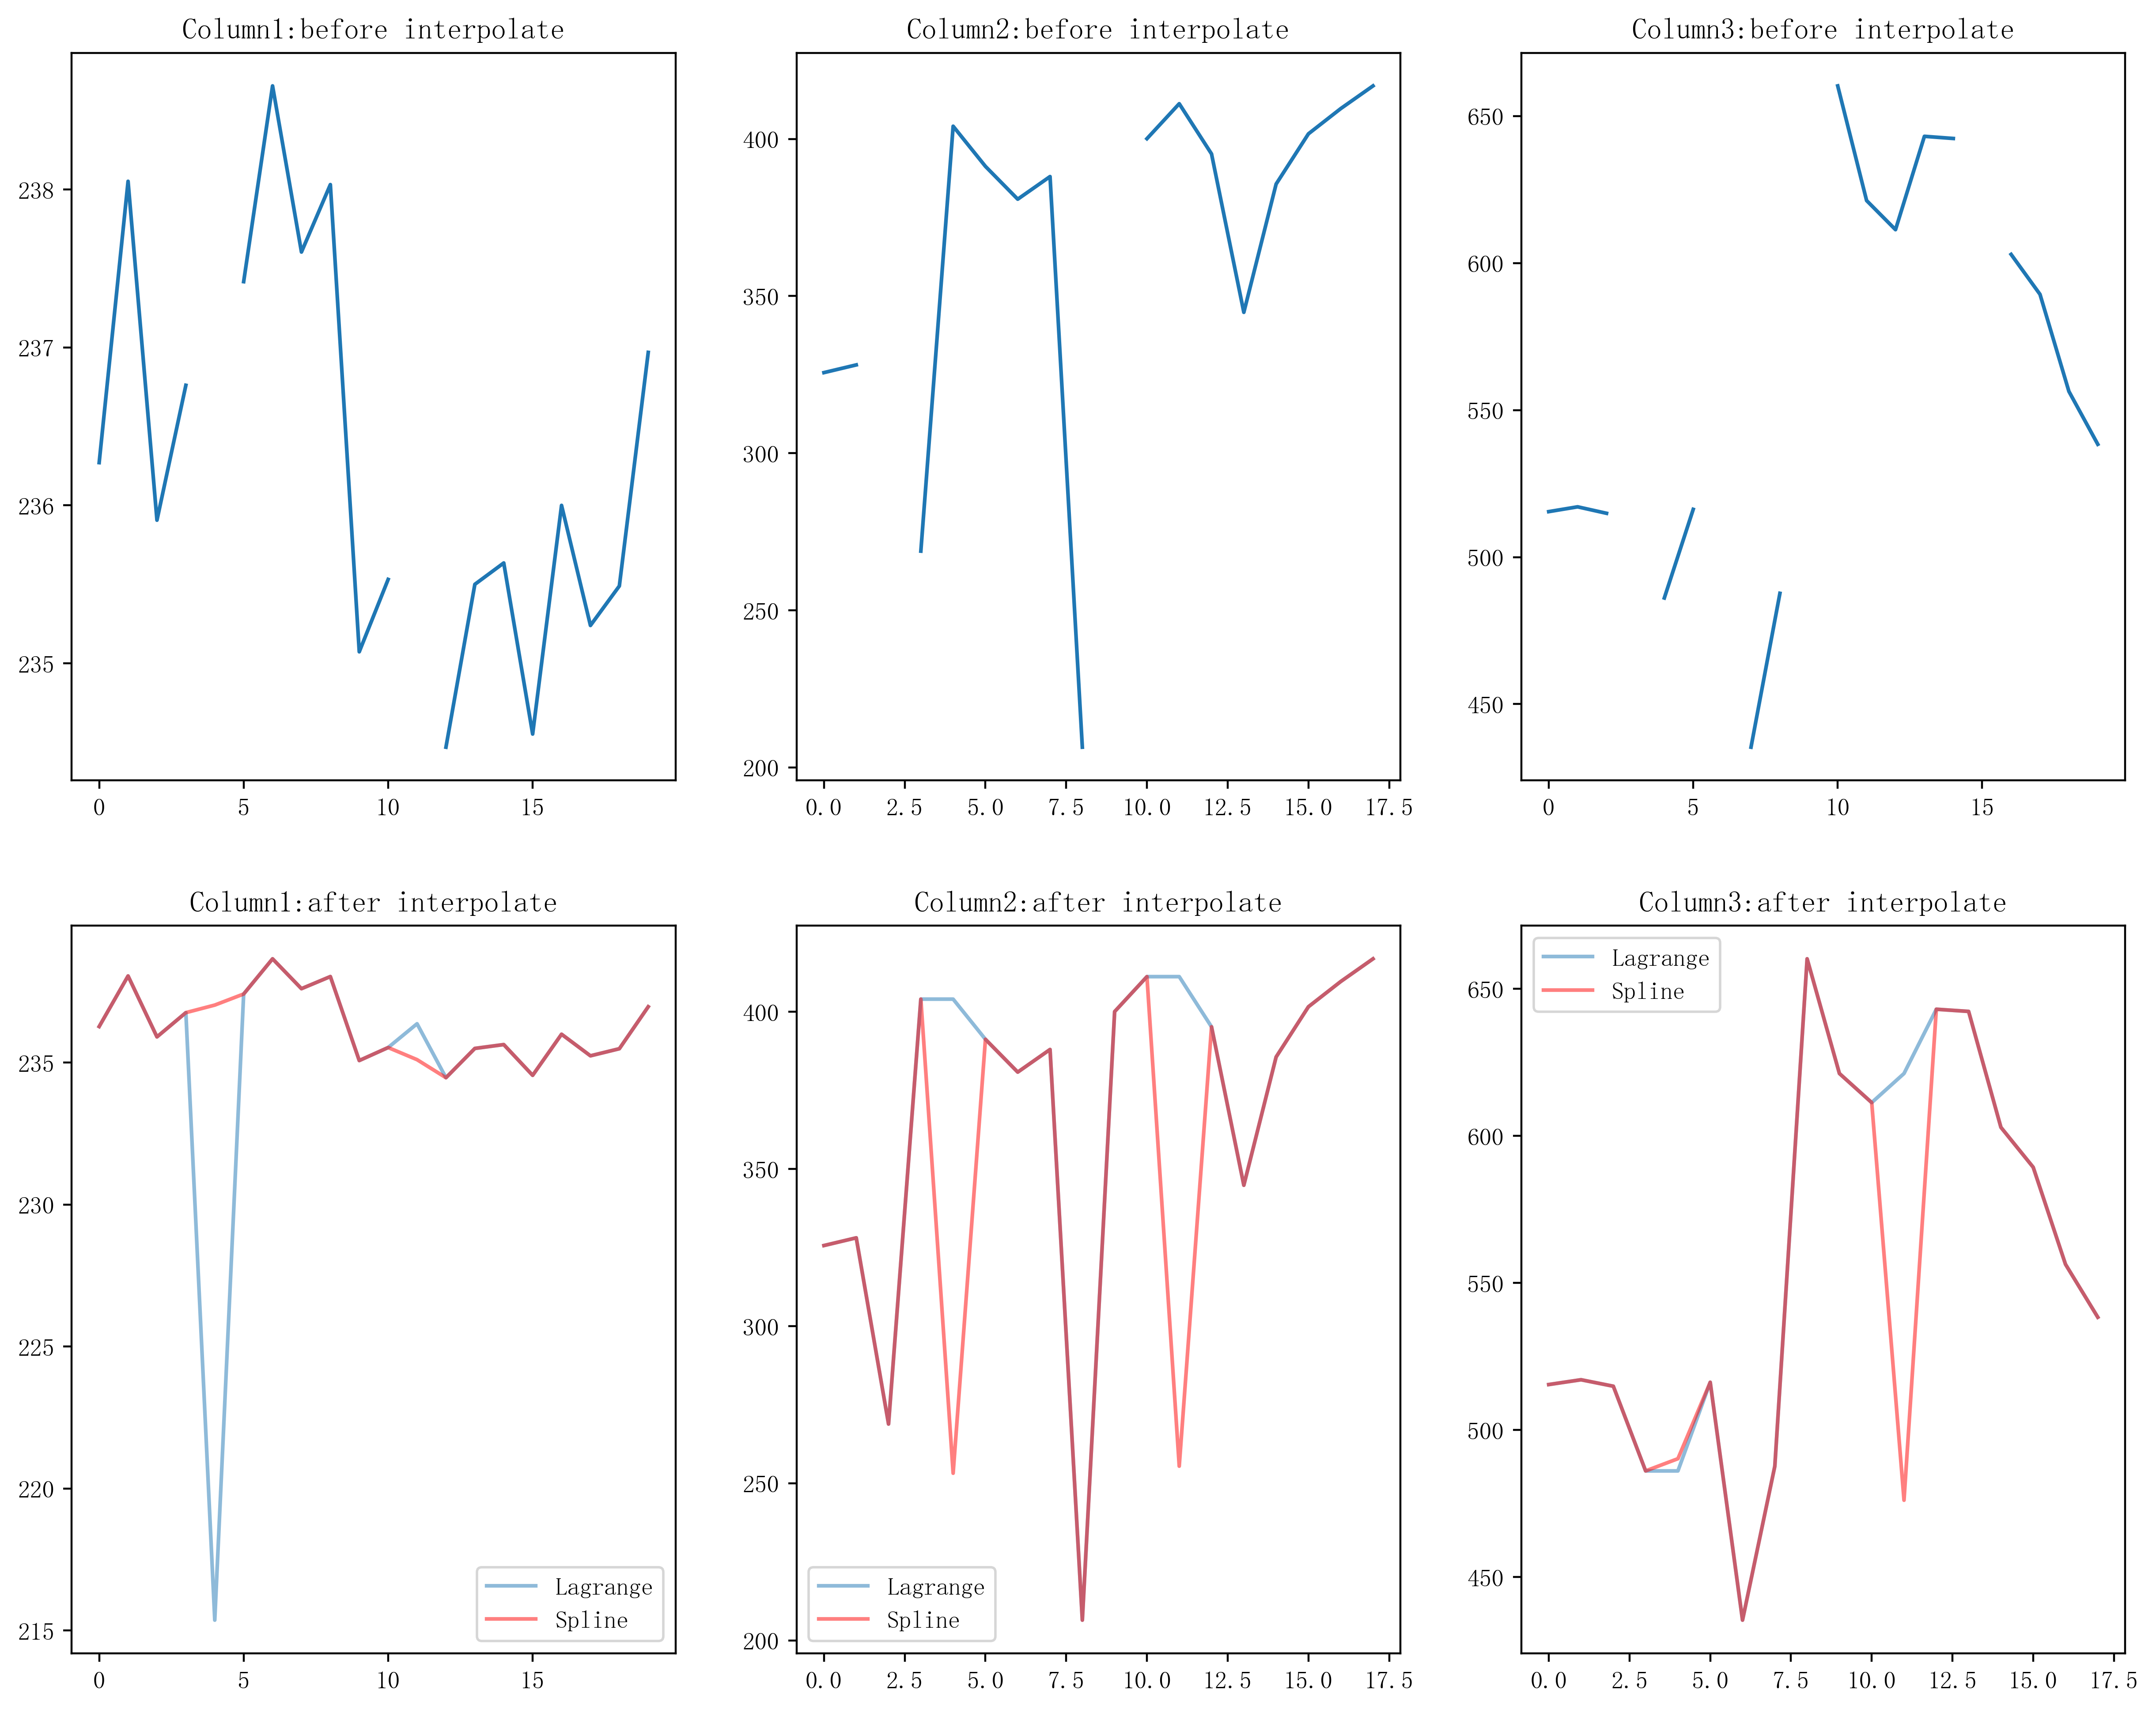

In [20]:
col1 = missing.iloc[:,[0]]
col2 = missing.iloc[:,[1]]
col3 = missing.iloc[:,[2]]

good1 = missing[col1.notnull().values==True].iloc[:,[0]]
x1 = np.array(good1.index.tolist())
y1 = np.array(good1.values).T[0]
good2 = missing[col2.notnull().values==True].iloc[:,[1]]
x2 = np.array(good2.index.tolist())
y2 = np.array(good2.values).T[0]
good3 = missing[col3.notnull().values==True].iloc[:,[2]]
x3 = np.array(good3.index.tolist())
y3 = np.array(good3.values).T[0]

def LargeInsValue(missing_column_location,x,y):
    #print('input x:',x)
    #print('input y:',y)
    LargeInsValue_cal = lagrange(x,y)
    lars = LargeInsValue_cal(missing_c1_location)
    #print('The Lagrange value will be insert:',lars)
    count = 0
    y_after = y.tolist()
    for i in missing_c1_location:
        y_after.insert(i,lars[count])
        count+=1
    #print('result:',y_after)
    return y_after

def SplineInsValue(missing_column_location,x,y):
    #print('input x:',x)
    #print('input y:',y)
    LargeInsValue_cal = spline(x,y,xnew=missing_column_location)
    #print('The Spline value will be insert:',LargeInsValue_cal)
    count = 0
    y_after = y.tolist()
    for i in missing_c1_location:
        y_after.insert(i,LargeInsValue_cal[count])
        count+=1
    #print('result:',y_after)
    return y_after

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


p1 = plt.figure(figsize=(15,12),dpi = 400)
ax1 = p1.add_subplot(2,3,1)
plt.title('Column1:before interpolate')
plt.plot(col1)
ax2 = p1.add_subplot(2,3,2)
plt.title('Column2:before interpolate')
plt.plot(col2)
ax3 = p1.add_subplot(2,3,3)
plt.title('Column3:before interpolate')
plt.plot(col3)

ax4 = p1.add_subplot(2,3,4)
plt.title('Column1:after interpolate')
plt.plot(LargeInsValue(missing_c1_location,x1,y1),alpha=0.5)
plt.plot(SplineInsValue(missing_c1_location,x1,y1),c='r',alpha=0.5)
plt.legend(['Lagrange','Spline'])
ax5 = p1.add_subplot(2,3,5)
plt.title('Column2:after interpolate')
plt.plot(LargeInsValue(missing_c2_location,x2,y2),alpha=0.5)
plt.plot(SplineInsValue(missing_c2_location,x2,y2),c='r',alpha=0.5)
plt.legend(['Lagrange','Spline'])
ax6 = p1.add_subplot(2,3,6)
plt.title('Column3:after interpolate')
plt.plot(LargeInsValue(missing_c3_location,x3,y3),alpha=0.5)
plt.plot(SplineInsValue(missing_c3_location,x3,y3),c='r',alpha=0.5)
plt.legend(['Lagrange','Spline'])
plt.savefig('insValue')
plt.show()

### Whole:

In [ ]:
import matplotlib.pyplot as plt
from pylab import mpl
from scipy.interpolate import lagrange
from scipy.interpolate import spline
import pandas as pd
import numpy as np
missing = pd.read_excel('missing_data.xls')

missing[missing.isnull().values==True]
missing_c1_location = missing[missing.iloc[:,[0]].isnull().values==True].index.tolist()
missing_c2_location = missing[missing.iloc[:,[1]].isnull().values==True].index.tolist()
missing_c3_location = missing[missing.iloc[:,[2]].isnull().values==True].index.tolist()


col1 = missing.iloc[:,[0]]
col2 = missing.iloc[:,[1]]
col3 = missing.iloc[:,[2]]

good1 = missing[col1.notnull().values==True].iloc[:,[0]]
x1 = np.array(good1.index.tolist())
y1 = np.array(good1.values).T[0]
good2 = missing[col2.notnull().values==True].iloc[:,[1]]
x2 = np.array(good2.index.tolist())
y2 = np.array(good2.values).T[0]
good3 = missing[col3.notnull().values==True].iloc[:,[2]]
x3 = np.array(good3.index.tolist())
y3 = np.array(good3.values).T[0]

def LargeInsValue(missing_column_location,x,y):
    #print('input x:',x)
    #print('input y:',y)
    LargeInsValue_cal = lagrange(x,y)
    lars = LargeInsValue_cal(missing_c1_location)
    #print('The Lagrange value will be insert:',lars)
    count = 0
    y_after = y.tolist()
    for i in missing_c1_location:
        y_after.insert(i,lars[count])
        count+=1
    #print('result:',y_after)
    return y_after

def SplineInsValue(missing_column_location,x,y):
    #print('input x:',x)
    #print('input y:',y)
    LargeInsValue_cal = spline(x,y,xnew=missing_column_location)
    #print('The Spline value will be insert:',LargeInsValue_cal)
    count = 0
    y_after = y.tolist()
    for i in missing_c1_location:
        y_after.insert(i,LargeInsValue_cal[count])
        count+=1
    #print('result:',y_after)
    return y_after

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


p1 = plt.figure(figsize=(15,12),dpi = 400)
ax1 = p1.add_subplot(2,3,1)
plt.title('Column1:before interpolate')
plt.plot(col1)
ax2 = p1.add_subplot(2,3,2)
plt.title('Column2:before interpolate')
plt.plot(col2)
ax3 = p1.add_subplot(2,3,3)
plt.title('Column3:before interpolate')
plt.plot(col3)

ax4 = p1.add_subplot(2,3,4)
plt.title('Column1:after interpolate')
plt.plot(LargeInsValue(missing_c1_location,x1,y1),alpha=0.5)
plt.plot(SplineInsValue(missing_c1_location,x1,y1),c='r',alpha=0.5)
plt.legend(['Lagrange','Spline'])
ax5 = p1.add_subplot(2,3,5)
plt.title('Column2:after interpolate')
plt.plot(LargeInsValue(missing_c2_location,x2,y2),alpha=0.5)
plt.plot(SplineInsValue(missing_c2_location,x2,y2),c='r',alpha=0.5)
plt.legend(['Lagrange','Spline'])
ax6 = p1.add_subplot(2,3,6)
plt.title('Column3:after interpolate')
plt.plot(LargeInsValue(missing_c3_location,x3,y3),alpha=0.5)
plt.plot(SplineInsValue(missing_c3_location,x3,y3),c='r',alpha=0.5)
plt.legend(['Lagrange','Spline'])
plt.show()



## 2.合并线损，用电量趋势和线路告警数据

### （1）读取ele_loss.csv, alarm.csv

In [21]:
import pandas as pd
import numpy as np
loss = pd.read_csv('ele_loss.csv',encoding='gbk')
alarm = pd.read_csv('alarm.csv',encoding='gbk')

### （2）查看二者形状

In [22]:
print(loss.shape)
print(alarm.shape)

(49, 4)
(25, 3)


### （3）ID、date两者作为主键进行内链接

In [23]:
merge_table = pd.merge(alarm,loss,on=['ID','date'])

### （4）查看合并后数据

In [24]:
merge_table

,ID,date,alarm,ele,loss
0,21261001,2010/9/3,电流不平衡,858.0,0.151048
1,21261001,2010/9/6,C相电流过负荷,883.5,0.162778
2,21261001,2010/9/16,C相电流过负荷,915.5,0.162028
3,21261001,2010/9/16,C相电流过负荷,915.5,0.162028
4,21261001,2010/9/17,A相电流过负荷,961.0,0.166650
5,21261001,2010/9/17,电流不平衡,961.0,0.166650


### Whole：

In [ ]:
import pandas as pd
import numpy as np
loss = pd.read_csv('ele_loss.csv',encoding='gbk')
alarm = pd.read_csv('alarm.csv',encoding='gbk')

print(loss.shape)
print(alarm.shape)

merge_table = pd.merge(alarm,loss)

merge_table

## 3.标准化建模专家样本数据

### （1）读取model.csv

In [25]:
import pandas as pd
import numpy as np
model = pd.read_excel('model.xls',encoding='gbk')
model

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
5,2,0,0,0
6,5,0,2,1
7,3,1,3,1
8,3,0,0,0
9,4,1,0,0


### （2）定义标准差标准化函数

In [26]:
# 离差标准化,不改变原先的整体分布，局限于[0,1]。缺点：极差过大，离差标准化的值接近于0，且相互差距不大
def MinMax(data):
    data=(data-data.min())/(data.max()-data.min())
    #print("polar:",data.max()-data.min())
    return data
# 标准差标准化，不改变原先的整体分布，与上者比，不局限于[0,1],有负值，受数据分布的影响较小。
def StandardScaler(data):
    data = (data-data.mean())/data.std()
    #print("mean:",data.mean())
    #print("std:",data.std())
    return data
# 小数定标标准化，适用范围广，受数据分布影响小
def DemicalScaler(data):
    data = data/10**np.ceil(np.log10(data.abs().max()))
    return data

### （3）使用该函数分别对三列数据标准化

In [27]:
s1 = StandardScaler(model.iloc[:,[0]])
s2 = StandardScaler(model.iloc[:,[1]])
s3 = StandardScaler(model.iloc[:,[2]])



### （4）查看标准化后数据

In [28]:
print('标准差标准化结果:\n')
pd.concat([s1,s2,s3],axis=1)

标准差标准化结果:



,电量趋势下降指标,线损指标,告警类指标
0,0.612777,0.974549,-0.161216
1,0.612777,-1.022590,2.653616
2,-0.343352,0.974549,-0.161216
3,3.003099,-1.022590,-1.099494
4,0.134712,0.974549,-1.099494
5,-0.343352,-1.022590,-1.099494
6,1.090841,-1.022590,0.777061
7,0.134712,0.974549,1.715339
8,0.134712,-1.022590,-1.099494
9,0.612777,0.974549,-1.099494


### Whole:

In [ ]:
import pandas as pd
import numpy as np
model = pd.read_excel('model.xls',encoding='gbk')
# 标准差标准化，不改变原先的整体分布，与上者比，不局限于[0,1],有负值，受数据分布的影响较小。
def StandardScaler(data):
    data = (data-data.mean())/data.std()
    #print("mean:",data.mean())
    #print("std:",data.std())
    return data
s1 = StandardScaler(model.iloc[:,[0]])
s2 = StandardScaler(model.iloc[:,[1]])
s3 = StandardScaler(model.iloc[:,[2]])

print('标准差标准化结果:\n')
pd.concat([s1,s2,s3],axis=1)